In [2]:
import numpy as np
import torch
import torch.nn as nn
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from src.dnn import *
from tqdm.notebook import tqdm
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## QNN

In [ ]:
np.random.seed(42)
backend = Aer.get_backend('qasm_simulator')

layer1 = Layer(n_qubits=1, n_inputs=1, n_outputs=3, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=np.pi, backend=backend, shots=2000)
layer2 = Layer(n_qubits=3, n_inputs=3, n_outputs=1, encoder=Encoder(), ansatz=Ansatz(), reps=2, scale=1, backend=backend, shots=2000)
layers = [layer1, layer2]

optimizer = ADAM(lr=0.01)
network = QNN(layers, optimizer)

In [ ]:
x = np.linspace(0, 1, 10).reshape(-1,1)
y = np.exp(-10*(x-0.5)**2)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in tqdm(range(60)):
    network.backward(x, y)

    y_pred = []
    for x_ in x:
        network(x_)
        y_pred.append(network.a[-1])
    
    network.step()
    
    ax.clear()
    ax.plot(x, y)
    ax.plot(x, y_pred)
    ax.set_ylim([0, 1])
    fig.canvas.draw()

#### Sigmoid

In [ ]:
np.random.seed(42)
x = np.random.uniform(0, np.pi/2, (20, 3))
beta = np.array([1,1,1]).reshape(-1,1)
z = (x-np.pi/4)@beta
y = 1/(1+np.exp(-2*z))


print(x.shape)
print(y.shape)
#plt.plot(z, y, "o")
#plt.show()

In [ ]:
np.random.seed(39)
backend = Aer.get_backend('qasm_simulator')

layer1 = Layer(n_qubits=3, n_inputs=3, n_outputs=3, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=np.pi, backend=backend, shots=2000)
layer2 = Layer(n_qubits=3, n_inputs=3, n_outputs=1, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=1, backend=backend, shots=2000)
layers = [layer1]

optimizer = ADAM(lr=0.01)
network = QNN(layers, optimizer)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()


for i in tqdm(range(30)):
    network.backward(x, y)

    y_pred = []
    for x_ in x:
        network(x_)
        y_pred.append(network.a[-1])
    
    network.step()
    
    ax.clear()
    ax.plot(z, y, "o")
    ax.plot(z, y_pred, "o")
    ax.set_ylim([0, 1])
    fig.canvas.draw()

#### ReLu

In [ ]:
np.random.seed(42)
x = np.random.uniform(0, np.pi/2, (20, 3))
beta = np.array([1/3,-2/3,1/3]).reshape(-1,1)
z = x@beta
y = z*(0<z).astype(float)+0.1

#plt.plot(z, y, "o")
#plt.show()

In [ ]:
np.random.seed(39)
backend = Aer.get_backend('qasm_simulator')

layer1 = Layer(n_qubits=3, n_inputs=3, n_outputs=1, encoder=Encoder(), ansatz=Ansatz(), reps=3, scale=1, backend=backend, shots=1000)
layers = [layer1]

optimizer = ADAM(lr=0.01)
network = QNN(layers, optimizer)

<IPython.core.display.Javascript object>


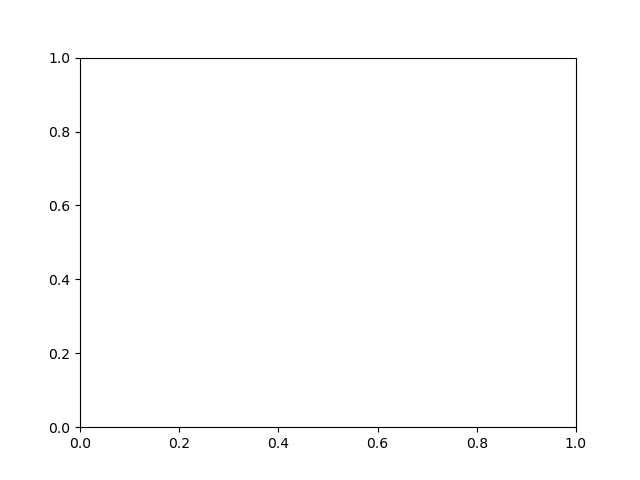

KeyboardInterrupt: 

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()


for i in tqdm(range(200)):
    network.backward(x, y)

    y_pred = []
    for x_ in x:
        network(x_)
        y_pred.append(network.a[-1])
    
    network.step()
    
    ax.clear()
    ax.plot(z, y, "o")
    ax.plot(z, y_pred, "o")
    ax.set_ylim([0, 1])
    fig.canvas.draw()

#### Radial Basis

In [12]:
np.random.seed(42)
x = np.random.uniform(0, np.pi/2, (20, 3))
beta = np.array([1/3,-2/3,1/3]).reshape(-1,1)
z = x@beta
y = 0.8*np.exp(-(z**2)/0.1) + 0.1

#plt.plot(z, y, "o")
#plt.show()

In [15]:
backend = Aer.get_backend('qasm_simulator')

layer1 = Layer(n_qubits=3, n_inputs=3, n_outputs=3, encoder=Encoder(), ansatz=Ansatz(), reps=2, scale=np.pi, backend=backend, shots=1)
layer2 = Layer(n_qubits=3, n_inputs=3, n_outputs=1, encoder=Encoder(), ansatz=Ansatz(), reps=2, scale=1, backend=backend, shots=1)
layers = [layer1, layer2]

optimizer = ADAM(lr=0.01)
network = QNN(layers, optimizer)

<IPython.core.display.Javascript object>


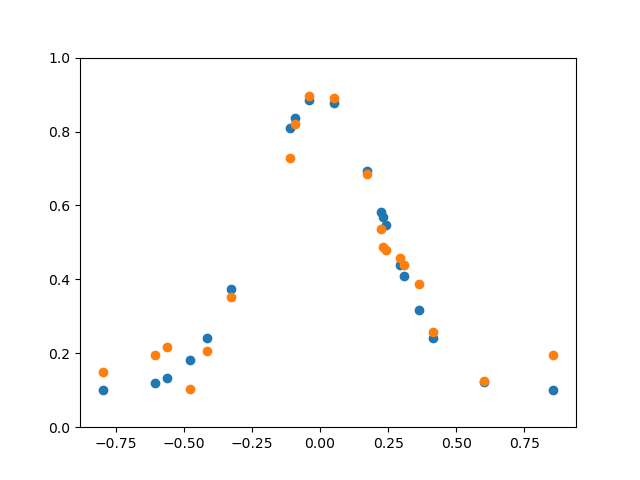

0.15790347247150105
0.1415851947639049
0.11899386462130099
0.12148031339552116
0.11685285649930206
0.1030211537904985
0.09359370955161166
0.08723032955850332
0.08397742870540692
0.07132309751542283
0.07066262403422112
0.07452260156221407
0.06921260709031803
0.06454493502963157
0.061735425706974024
0.060371712921869006
0.054168684247383726
0.05252066501290807
0.05027478274823473
0.04677284538780085
0.03774951700036139
0.038570469343460194
0.036660499565933605
0.037371281717913686
0.03942044341126695
0.03396169504576172
0.029048845366937172
0.029180340812220883
0.03149083993359131
0.025818525469945168
0.029218081087913888
0.021537323356624526
0.02168337646020718
0.019993780953591823
0.017515417050799086
0.014907260319009769
0.01496428713548574
0.016407041423022243
0.012668097897979352
0.011455526325717457
0.012150977752055134
0.012287016103342869
0.009882961730566088
0.009702047477457768
0.009070801264724681
0.006788161126263732
0.007609590171096044
0.005959371050426179
0.005818090661884

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
network.set_shots(1000)
for i in tqdm(range(100)):
    network.backward(x, y)

    y_pred = []
    for x_ in x:
        network(x_)
        y_pred.append(network.a[-1])
    
    y_pred = np.array(y_pred)
    loss = np.mean((y_pred - y)**2)
    print(loss)
    network.step()
    
    ax.clear()
    ax.plot(z, y, "o")
    ax.plot(z, y_pred, "o")
    ax.set_ylim([0, 1])
    fig.canvas.draw()

#### Classical NN

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.layer1 = nn.Linear(3, 2)
        self.layer2 = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = self.layer2(x)
        return x

In [ ]:
np.random.seed(42)
x = np.random.uniform(0, np.pi/2, (20, 3))
beta = np.array([1/3,-2/3,1/3]).reshape(-1,1)
#z = (x-np.pi/4)@beta

z = x@beta
#y = 1/(1+np.exp(-3*z))

y = 0.8*np.exp(-(z**2)/0.1) + 0.1
#y = z*(0<z).astype(float)+0.1


x = torch.tensor(x, dtype = torch.float, requires_grad=False)
y = torch.tensor(y, dtype = torch.float, requires_grad=False)

model = Model()
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in tqdm(range(200)):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = loss_func(y_pred, y)
    loss.backward()
    print(loss.detach())
    optimizer.step()
    
    ax.clear()
    ax.plot(z, y.detach(), "o")
    ax.plot(z, y_pred.detach(), "o")
    ax.set_ylim([-0.2, 1.2])
    fig.canvas.draw()